# Group 7: Hamed & Srinivas
Assignment 1: Concrete Strength Regression

In [62]:
# Importing Libararies
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1A:

In [63]:
# Load Datasets
cd = pd.read_csv("Concrete_Data_Yeh.csv")
cd

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [64]:
cd.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The dataset contains 9 columns: 7 of them are components( Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate) (kg in a m^3 mixture) also Age in days , and Concrete Compressive Strength in megapascals. The target variable is "Concrete Compressive Strength (MPa megapascals)," and the features are the other columns.

# Question 1B:

In [65]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Checking for duplicates 
##### We have used the duplicated function to check for the duplicates and there were 25 entities that were duplicated


In [66]:
cd[cd.duplicated()]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [67]:
cd[cd.duplicated()].shape

(25, 9)

In [68]:
cd1 = cd.drop_duplicates()

In [69]:
cd1

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [70]:
cd1[cd1.duplicated()]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa


##### No missing values

In [71]:
cd1.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

# Question 1C:



<AxesSubplot: >

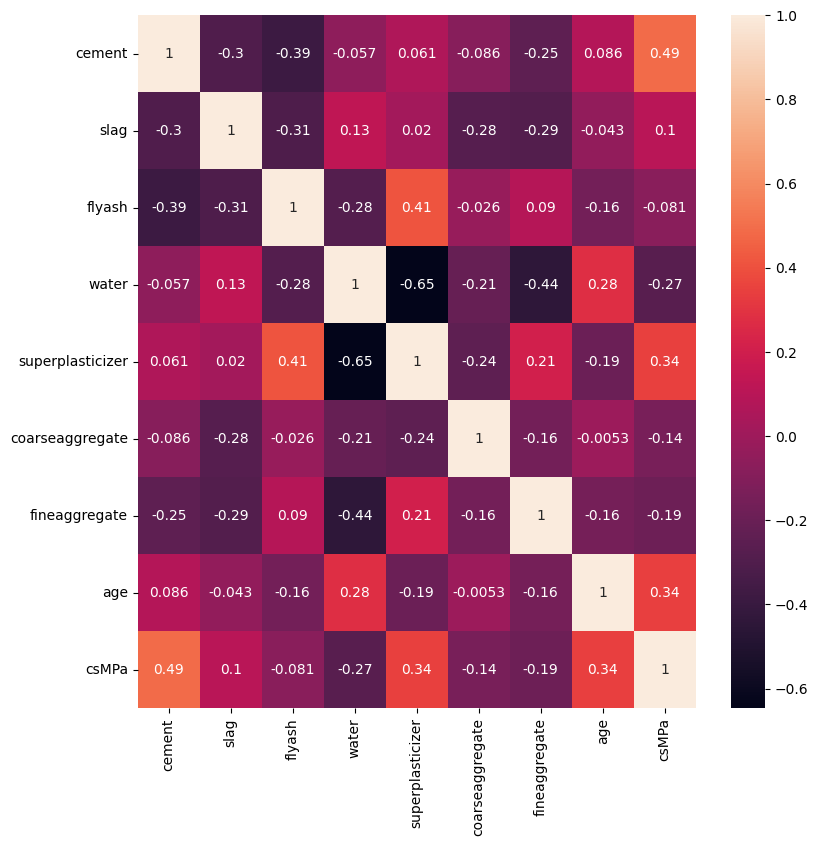

In [72]:
plt.figure(figsize=(9,9))
corr_matrix = cd1.corr()

sns.heatmap(corr_matrix, annot=True)

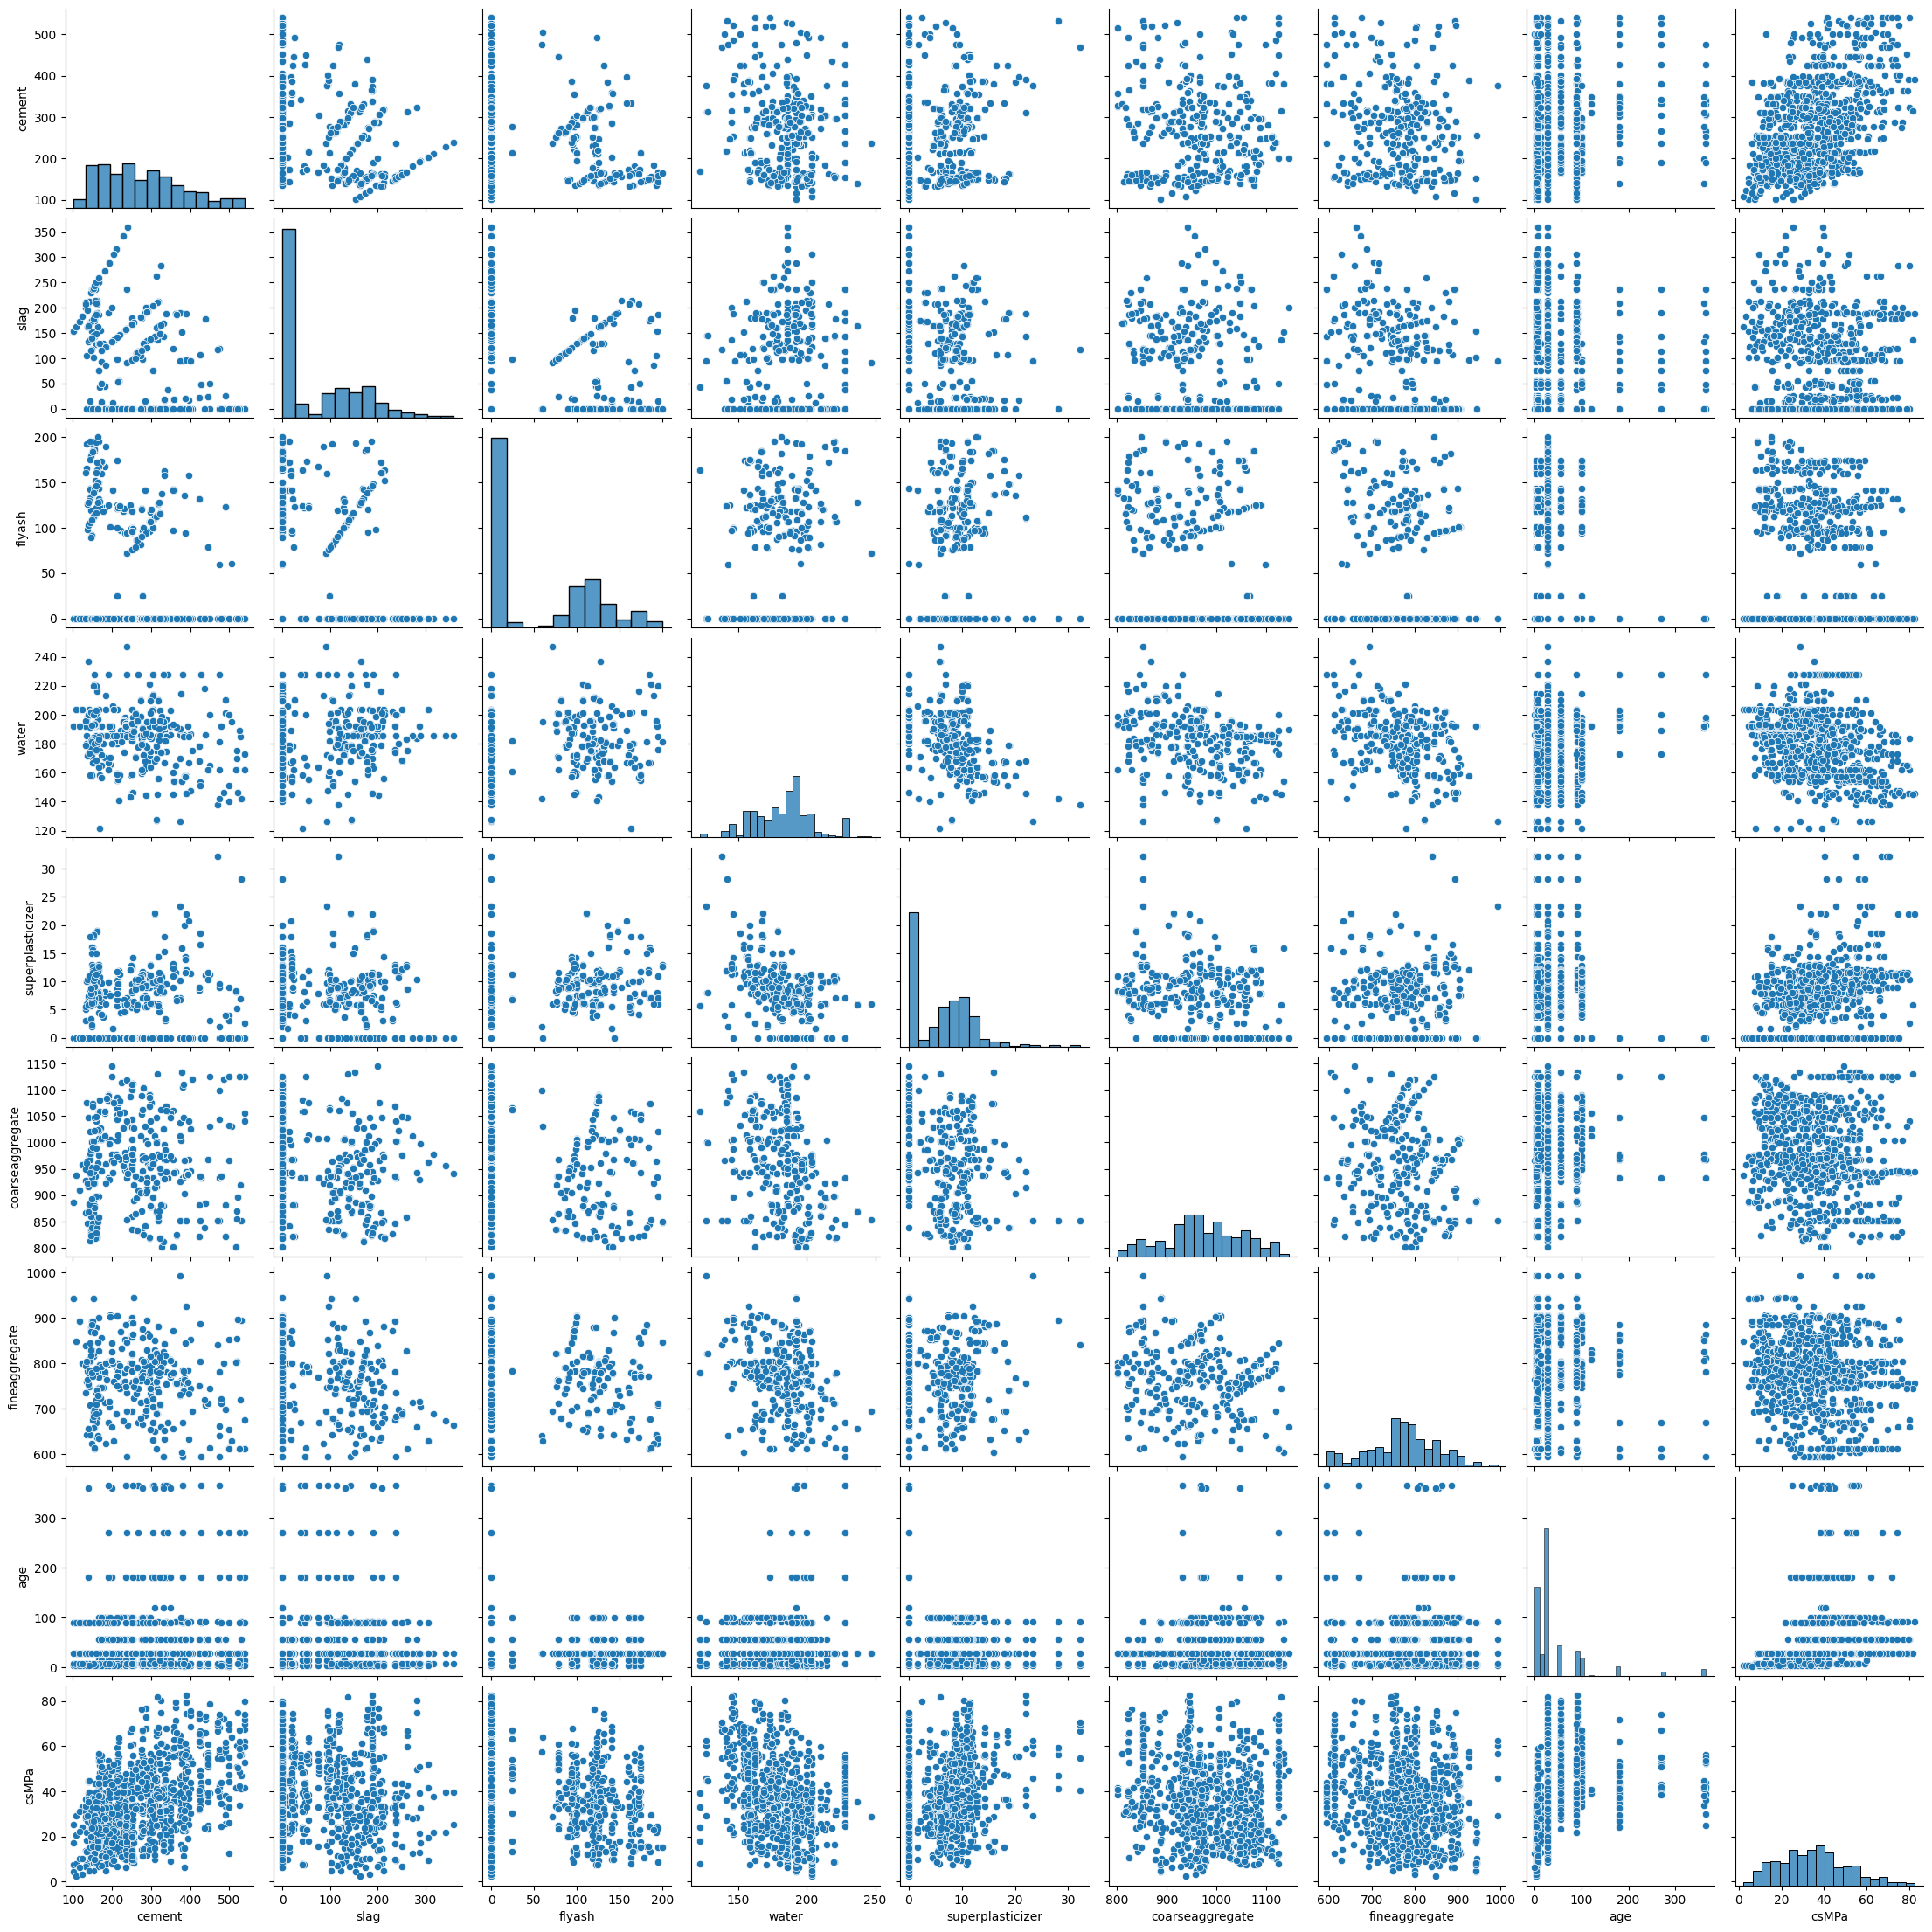

In [73]:
sns.pairplot(cd1)

This heatmap shows the correlation matrix of the features. When the correlation between csMPa and a feature is close to 1, it indicates a stronger positive correlation. This suggests that as that particular feature increases, the compressive strength also increases

As we can see that Cement has the highest positive correlation with compressive strength (csMPa) among all the features, with a correlation coefficient of 0.488. Moreover Superplasticizer and age have the second highest positive correlation of 0.34. But from sns.pairplot we can see that Superplasticizer is slightly better than age. On the other hand, water tends to have th lowes correlation coefficient (-0.27)

# Question 1D:

In [74]:
# importing libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [75]:
# new dataset
df = cd1

# Moving labels to a separate dataframe
y = df['csMPa']  
X = df.drop(columns=['csMPa'])

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)

# Split the data into training and testing sets (90-10, training-testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.1, random_state=42)

In [76]:
# Checking the shape of the training and testing data
print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Training data: {y_train.shape}")
print(f"Test data: {y_test.shape}")

Training data: (904, 8)
Test data: (101, 8)
Training data: (904,)
Test data: (101,)


# Question 2A:

In [101]:
# converting to a tensorflow variable
y_train_tensor = tf.Variable(y_train, dtype=tf.float32)
y_test_tensor = tf.Variable(y_test, dtype=tf.float32)
X_train_tensor = tf.Variable(X_train, dtype=tf.float32)
X_test_tensor = tf.Variable(X_test, dtype=tf.float32)


# Question 2B:

In [78]:
# Create TensorFlow variables for weights and bias 
num_features = X_train_tensor.shape[1]
w = tf.Variable(tf.zeros((num_features, 1), dtype=tf.float32), name="weights")
b = tf.Variable(tf.zeros((1,), dtype=tf.float32), name="bias")

# Question 2C:

In [79]:
def linear_regression(X):
    "This function will caculate  and return the predicted values (z) based on the given input features (X) and the learned weights (w) and bias (b). "
    z = np.matmul(X,w)+b
    return z

# Question 2D & E:

In [96]:
# Define the loss function (MSE)
loss_function = lambda: tf.reduce_mean((y_train_tensor - linear_regression(X_train_tensor)))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Number of training epochs
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Calculate and minimize the loss
    optimizer.minimize(loss_function, var_list=[w, b])

# Print the trained weights and bias
print("Trained Weights (w):", w.numpy())
print("Trained Bias (b):", b.numpy())


Trained Weights (w): [[4.0238123]
 [1.9917547]
 [2.8053336]
 [4.8172464]
 [1.8760121]
 [5.0082192]
 [4.5023437]
 [1.2139233]]
Trained Bias (b): [44.946735]


In [97]:
# Print the trained weights and bias
print("Trained Weights (w):", w.numpy())
print("Trained Bias (b):", b.numpy())

Trained Weights (w): [[4.0238123]
 [1.9917547]
 [2.8053336]
 [4.8172464]
 [1.8760121]
 [5.0082192]
 [4.5023437]
 [1.2139233]]
Trained Bias (b): [44.946735]


# Question 2F:

In [98]:
# calculating RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean(np.square(predictions - targets)))

train_predictions = linear_regression(X_train_tensor)
train_rmse = train_predictions - y_train_tensor

# Calculate RMSE on the training data
train_rmse = rmse(train_predictions, y_train)
print("RMSE on Training Data:", train_rmse)

RMSE on Training Data: 25.951403


# Question 3A:

In [99]:
# predictions on the test data
test_predictions = linear_regression(X_test_tensor)

# Question 3B:

In [100]:
# Calculate the percentage of deviations greater than RMSE
deviations = tf.abs(test_predictions - y_test_tensor)
percentage_deviations = tf.reduce_mean(tf.cast(deviations > train_rmse, dtype=tf.float32)) * 100

print(f"Percentage of Deviations bigger than RMSE: {percentage_deviations:.2f}%")


Percentage of Deviations bigger than RMSE: 28.14%


# Conclusion:

Trained Weights (w): [[4.0238123] \
 [1.9917547] \
 [2.8053336] \
 [4.8172464] \
  [1.8760121]\
 [5.0082192]\
 [4.5023437]\
 [1.2139233]]\
Trained Bias (b): [44.946735]

RMSE on Training Data: 25.951403 <br>
Percentage of Deviations bigger than RMSE: 28.14%

Based on the RMSE, This indicates that the model is performing consistently on both the data it was trained on and unseen test data. However the percentage of deviation signifies that almost one-third of the prediction have errors that exceed the RMSE. This implies that there are instances where the model's predictions significantly deviate from the actual values. This suggests that there might be some level of uncertainty associated with the model's predictions.

Structural engineers should be aware of measurement accuracy and limitation of the model.
